In [738]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [739]:
data = pd.read_csv('./kc_house_data.csv')
data.drop('id', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.isnull().values.any()

False

In [740]:
data.fillna(data.median(), inplace=True)
columns = data.columns
print(columns)
price = data['price']
data.isnull().values.any()

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


False

In [741]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [742]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)

In [743]:
x_train = torch.from_numpy(x_train.values).float()
y_train = torch.from_numpy(y_train.values).float()
x_test = torch.from_numpy(x_test.values).float()
y_test = torch.from_numpy(y_test.values).float()

y_test

tensor([ 365000.,  865000., 1038000.,  ...,  285000.,  605000.,  356500.])

In [744]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(18, 144)
        self.fc2 = nn.Linear(144, 72)
        self.fc3 = nn.Linear(72, 18)
        self.fc4 = nn.Linear(18, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        
        return x

In [835]:
model = Regressor()
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [836]:
num_epochs = 300

In [837]:
for i in range(20):
    for step in range(num_epochs):

        output = model(x_train[step])
        cost = torch.sqrt(loss(torch.log(output), torch.log(y_train[step])))

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if step % 100 == 0:
            print('Outer: [%d/%d], Epoch: [%d/%d], cost: %.4f' % (i + 1, 20, step + 1, num_epochs, cost.item()))
    

Outer: [1/20], Epoch: [1/300], cost: inf
Outer: [1/20], Epoch: [101/300], cost: 1.2444
Outer: [1/20], Epoch: [201/300], cost: 0.0515
Outer: [2/20], Epoch: [1/300], cost: 0.2718
Outer: [2/20], Epoch: [101/300], cost: 1.0930
Outer: [2/20], Epoch: [201/300], cost: 0.3491
Outer: [3/20], Epoch: [1/300], cost: 0.2407
Outer: [3/20], Epoch: [101/300], cost: 1.1293
Outer: [3/20], Epoch: [201/300], cost: 0.3560
Outer: [4/20], Epoch: [1/300], cost: 0.2581
Outer: [4/20], Epoch: [101/300], cost: 1.1186
Outer: [4/20], Epoch: [201/300], cost: 0.3676
Outer: [5/20], Epoch: [1/300], cost: 0.2705
Outer: [5/20], Epoch: [101/300], cost: 1.1112
Outer: [5/20], Epoch: [201/300], cost: 0.3654
Outer: [6/20], Epoch: [1/300], cost: 0.2904
Outer: [6/20], Epoch: [101/300], cost: 1.0818
Outer: [6/20], Epoch: [201/300], cost: 0.4061
Outer: [7/20], Epoch: [1/300], cost: 0.2951
Outer: [7/20], Epoch: [101/300], cost: 1.0682
Outer: [7/20], Epoch: [201/300], cost: 0.3356
Outer: [8/20], Epoch: [1/300], cost: 0.2704
Outer: 

In [838]:
predicted = []

model.eval()
for step in range(len(x_test)):
    output = model(x_test[step])
    predicted.append(output.item())
    
# predicted

In [839]:
sum_x = []
for i in range(len(x_test)):
    sum_x.append(x_test[i].sum().item())
sum_x

[123112.5234375,
 121222.3984375,
 131780.9375,
 141978.96875,
 116777.078125,
 120561.7265625,
 123864.015625,
 114432.7578125,
 108518.9609375,
 110708.2734375,
 114104.8046875,
 136414.203125,
 117322.265625,
 109713.5,
 111225.84375,
 135506.125,
 135912.40625,
 294350.90625,
 118405.0,
 135286.90625,
 117842.359375,
 164038.40625,
 543756.375,
 123013.9453125,
 107607.5546875,
 127505.8359375,
 123648.671875,
 111572.1953125,
 124281.953125,
 112854.78125,
 707211.9375,
 121922.8671875,
 121907.28125,
 117408.3515625,
 123830.25,
 132227.59375,
 121937.7890625,
 210363.796875,
 120455.5,
 128444.6875,
 205080.890625,
 115083.4140625,
 115505.7265625,
 116773.140625,
 126043.765625,
 116466.328125,
 121887.5078125,
 111877.3125,
 119519.28125,
 115692.859375,
 115673.7734375,
 115159.015625,
 126873.703125,
 112497.015625,
 106549.796875,
 169397.875,
 219440.4375,
 124650.578125,
 120269.484375,
 121199.09375,
 145336.03125,
 111276.1796875,
 118254.59375,
 160408.875,
 116858.382

In [840]:
real_y = []
for i in range(len(y_test)):
    real_y.append(y_test[i].item())
real_y

[365000.0,
 865000.0,
 1038000.0,
 1490000.0,
 711000.0,
 211000.0,
 790000.0,
 680000.0,
 384500.0,
 605000.0,
 638000.0,
 385000.0,
 175000.0,
 365000.0,
 160000.0,
 1070000.0,
 800000.0,
 795127.0,
 355000.0,
 474000.0,
 485000.0,
 930000.0,
 920000.0,
 560000.0,
 654000.0,
 549000.0,
 290000.0,
 275000.0,
 329990.0,
 750000.0,
 425000.0,
 515000.0,
 605000.0,
 250000.0,
 330000.0,
 984000.0,
 827500.0,
 485000.0,
 306000.0,
 1890000.0,
 514000.0,
 282613.0,
 309000.0,
 400000.0,
 310000.0,
 253200.0,
 334009.0,
 500000.0,
 441500.0,
 685000.0,
 327000.0,
 450000.0,
 356000.0,
 525000.0,
 675000.0,
 875000.0,
 345000.0,
 695000.0,
 350000.0,
 695000.0,
 400000.0,
 330000.0,
 265000.0,
 630000.0,
 312000.0,
 156000.0,
 300000.0,
 1225000.0,
 465000.0,
 923990.0,
 320000.0,
 375000.0,
 985000.0,
 850000.0,
 474900.0,
 997000.0,
 1302000.0,
 209900.0,
 602000.0,
 1228000.0,
 856000.0,
 392000.0,
 500000.0,
 230000.0,
 1145000.0,
 560000.0,
 355000.0,
 785000.0,
 447500.0,
 540000.0,
 2

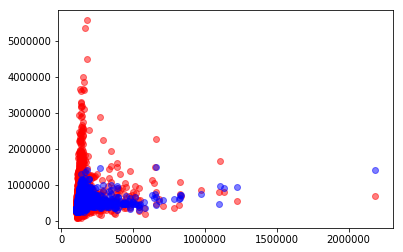

In [841]:
plt.scatter(sum_x, real_y, color='red', alpha=0.5)
plt.scatter(sum_x, predicted, color='blue', alpha=0.5)
plt.show()

In [842]:
predicted[331]

293178.65625

In [843]:
real_y[331]

555750.0

In [844]:
accuracy_t_f = []
acc_true = []
for i in range(len(predicted)):
    acc = abs(predicted[i] - real_y[i]) <= 100000
    accuracy_t_f.append(acc)
    if acc == True:
        acc_true.append(acc)

In [845]:
(len(acc_true) / len(accuracy_t_f)) * 100

44.274809160305345